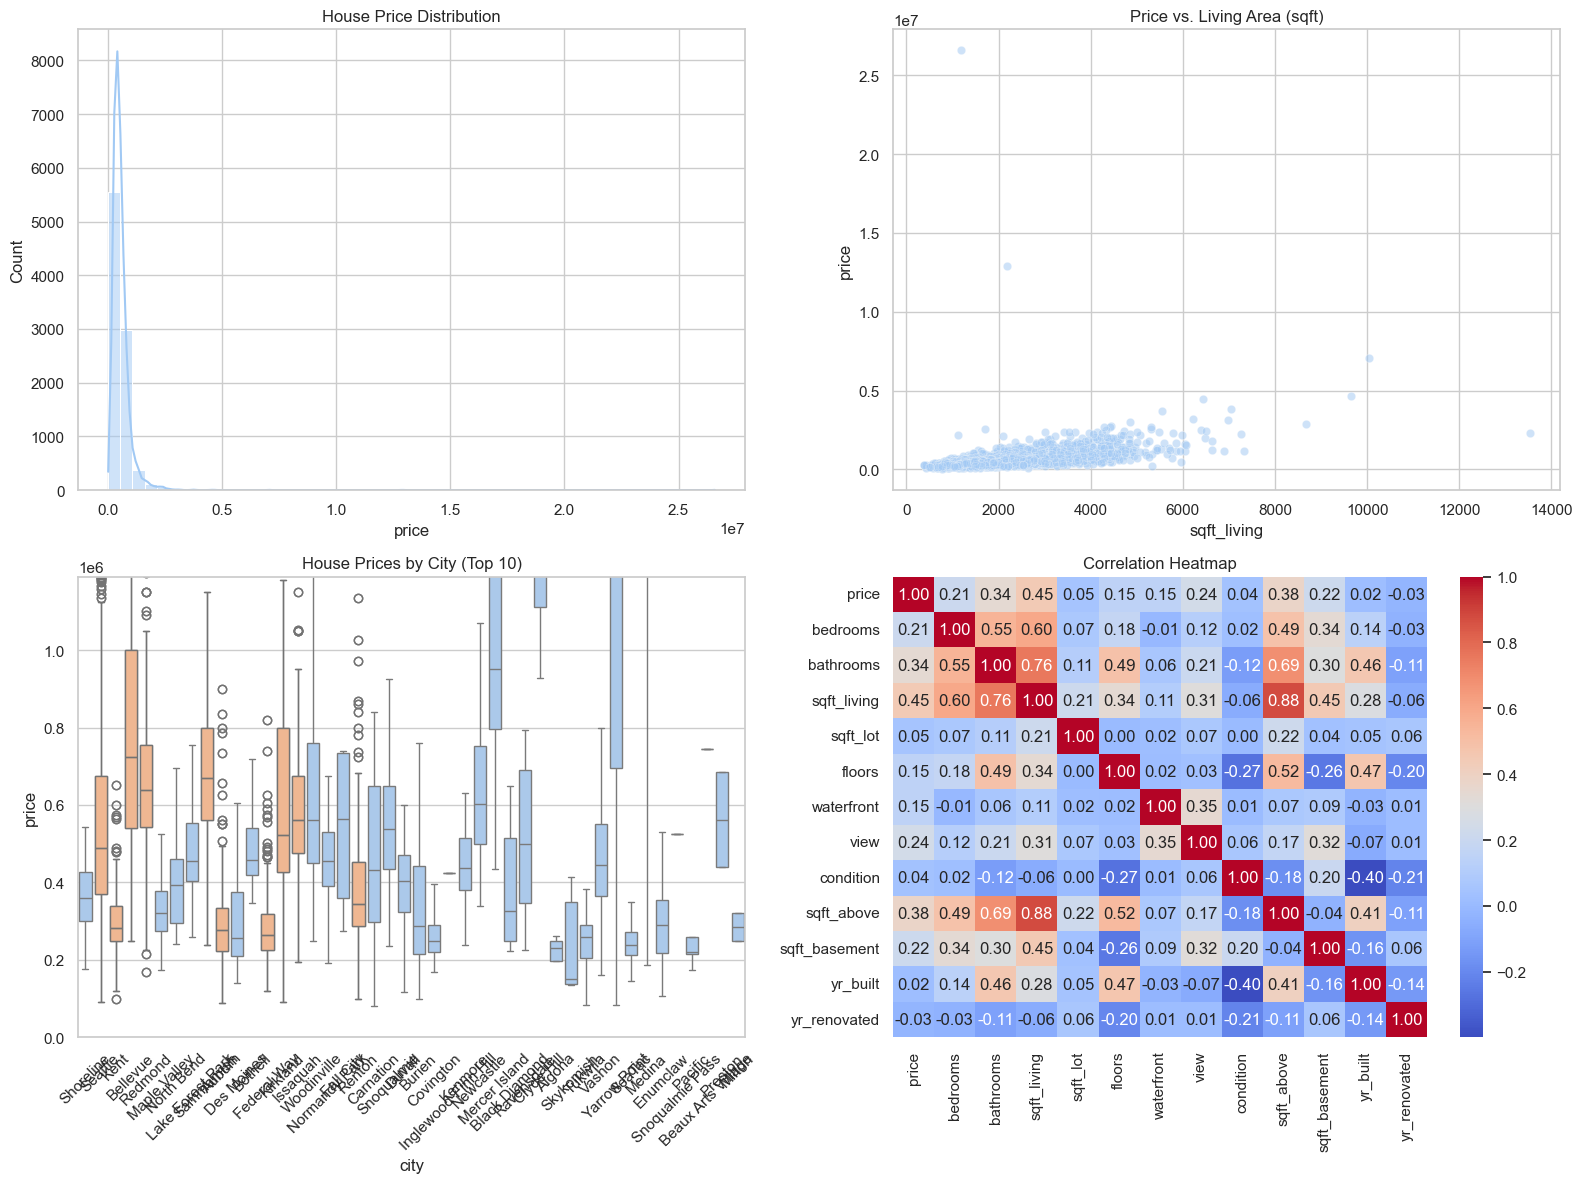

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

df = pd.read_csv("house_dataset.csv")

# 数据清洗
df_clean = df.copy()

# date转为datetime
df_clean["date"] = pd.to_datetime(df_clean["date"])

# yr_renovated 为 0 表示未翻新，替换为 NaN
df_clean["yr_renovated"] = df_clean["yr_renovated"].replace(0, np.nan)

# 新增一列是否翻新
df_clean["renovated"] = df_clean["yr_renovated"].notna().astype(int)

# 移除卧室数量异常值（>10）
df_clean = df_clean[df_clean["bedrooms"] <= 10]

# 移除房价为 0 
df_clean = df_clean[df_clean["price"] > 0]

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 房价分布图
sns.histplot(df_clean["price"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("House Price Distribution")

# 房屋面积 vs 房价 散点图
sns.scatterplot(data=df_clean, x="sqft_living", y="price", alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title("Price vs. Living Area (sqft)")

# 各城市房价箱型图（Top 10 城市）,去除异常值，调整图像大小
axes[1, 0].set_ylim(0, df_clean["price"].quantile(0.95))  # 去除异常值
sns.boxplot(data=df_clean, x="city", y="price", ax=axes[1, 0], showfliers=False)
top_cities = df_clean["city"].value_counts().nlargest(10).index
sns.boxplot(data=df_clean[df_clean["city"].isin(top_cities)], x="city", y="price", ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_title("House Prices by City (Top 10)")

# 特征相关性热图
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["price"]).columns
corr_matrix = df_clean[["price"] + list(numeric_cols)].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()

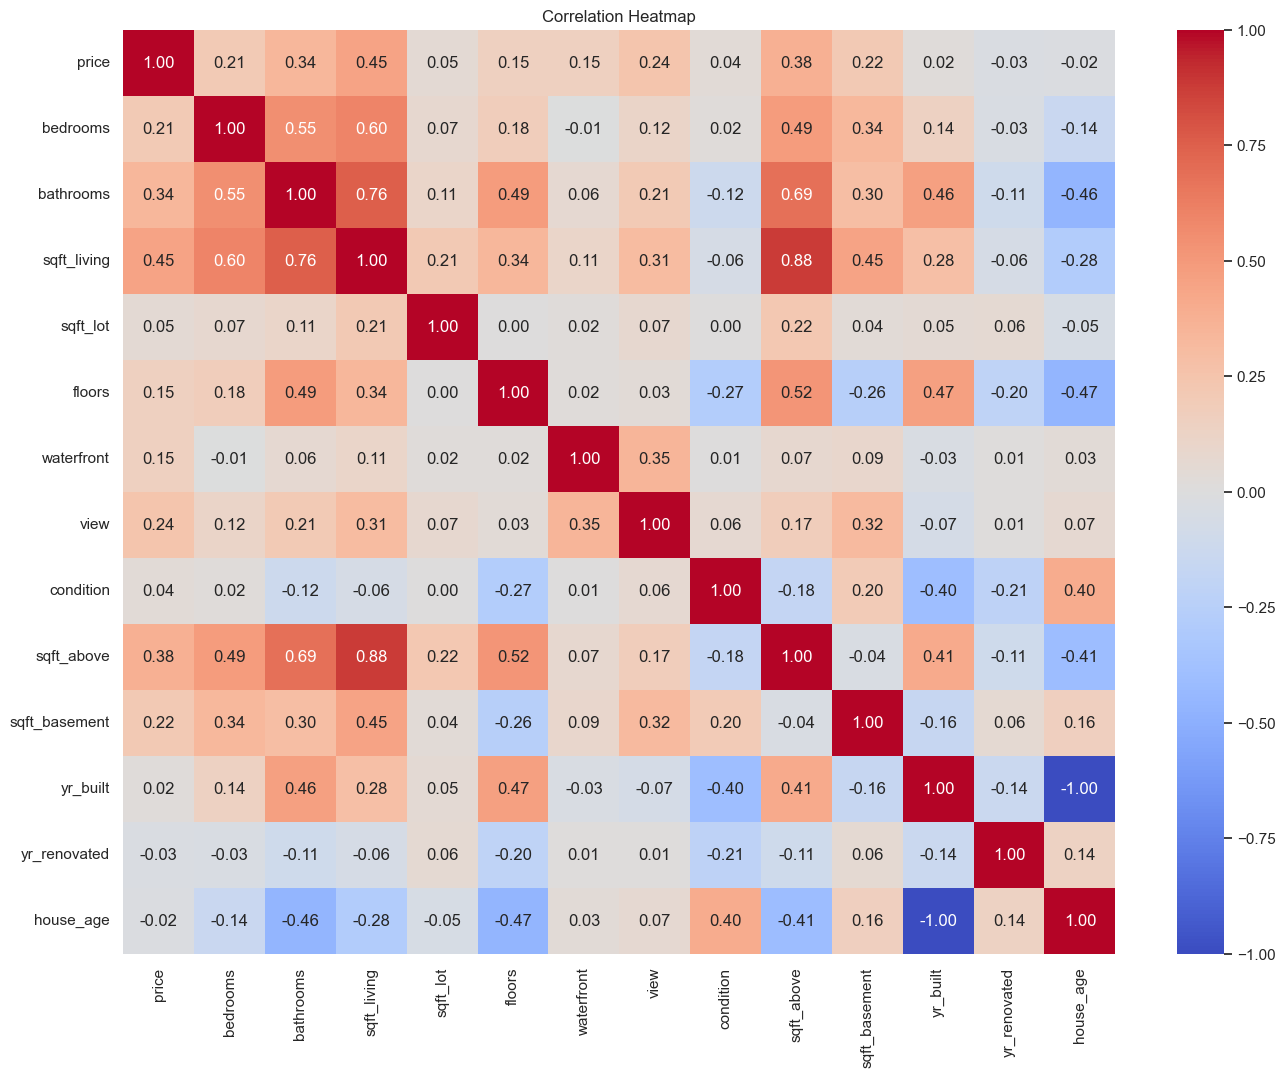

In [17]:
fig, axes = plt.subplots(figsize=(16, 12))
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).drop(columns=["price"]).columns
corr_matrix = df_clean[["price"] + list(numeric_cols)].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes)
axes.set_title("Correlation Heatmap")
plt.show()

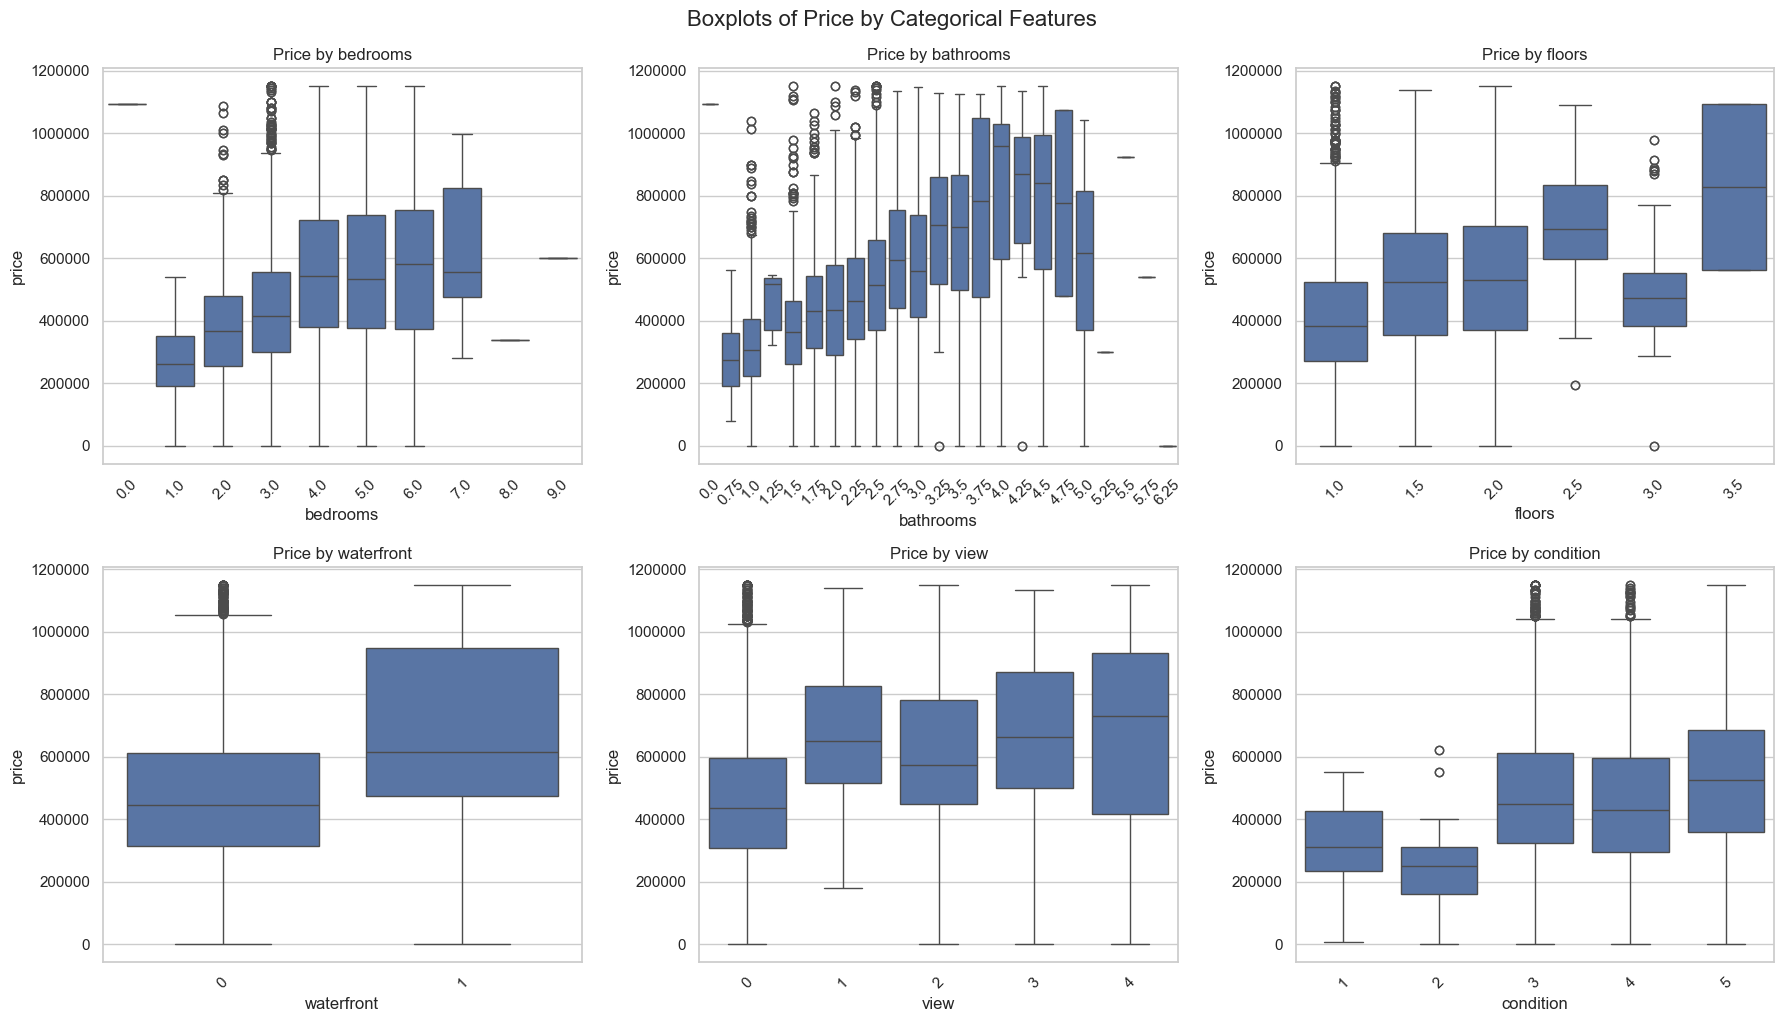

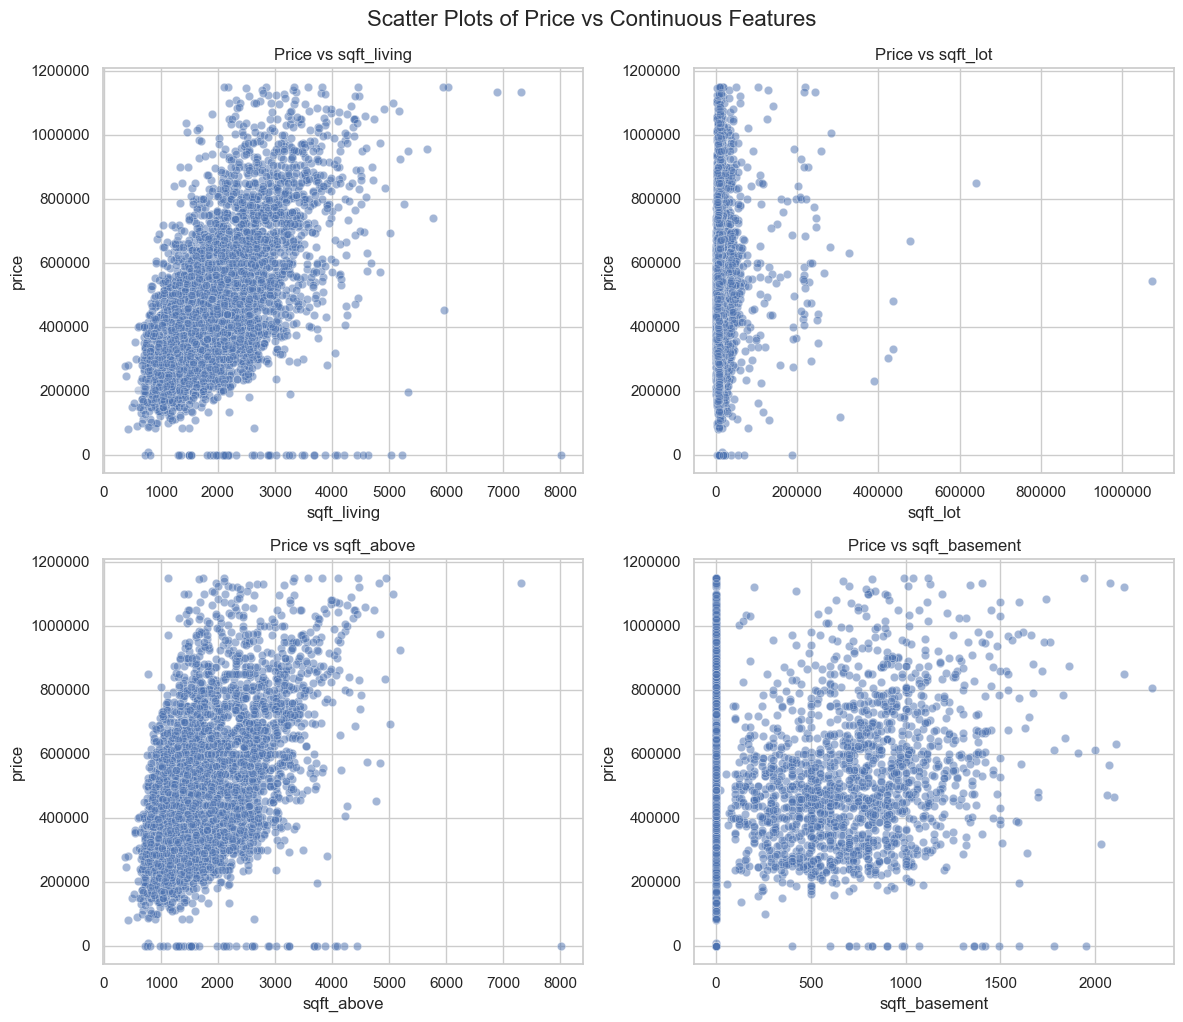

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# ---------- 去除价格的异常值 ----------
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# ---------- 特征列表 ----------
categorical_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']
continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# ---------- 设置风格 ----------
sns.set(style="whitegrid")

# ---------- 绘制箱型图 ----------
n_cat = len(categorical_features)
cols = 3
rows = (n_cat + cols - 1) // cols

fig1, axes1 = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
for i, feature in enumerate(categorical_features):
    r, c = divmod(i, cols)
    sns.boxplot(x=feature, y='price', data=df_clean, ax=axes1[r, c])
    axes1[r, c].set_title(f'Price by {feature}')
    axes1[r, c].tick_params(axis='x', rotation=45)

# 删除多余空子图
for j in range(i + 1, rows * cols):
    fig1.delaxes(axes1.flatten()[j])

plt.tight_layout()
plt.suptitle('Boxplots of Price by Categorical Features', fontsize=16, y=1.02)
plt.show()

# ---------- 绘制散点图 ----------
n_cont = len(continuous_features)
cols = 2
rows = (n_cont + cols - 1) // cols

fig2, axes2 = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
for i, feature in enumerate(continuous_features):
    r, c = divmod(i, cols)
    sns.scatterplot(x=feature, y='price', data=df_clean, alpha=0.3, ax=axes2[r, c])
    axes2[r, c].set_title(f'Price vs {feature}')

# 删除多余空子图
for j in range(i + 1, rows * cols):
    fig2.delaxes(axes2.flatten()[j])

plt.tight_layout()
plt.suptitle('Scatter Plots of Price vs Continuous Features', fontsize=16, y=1.02)
plt.show()


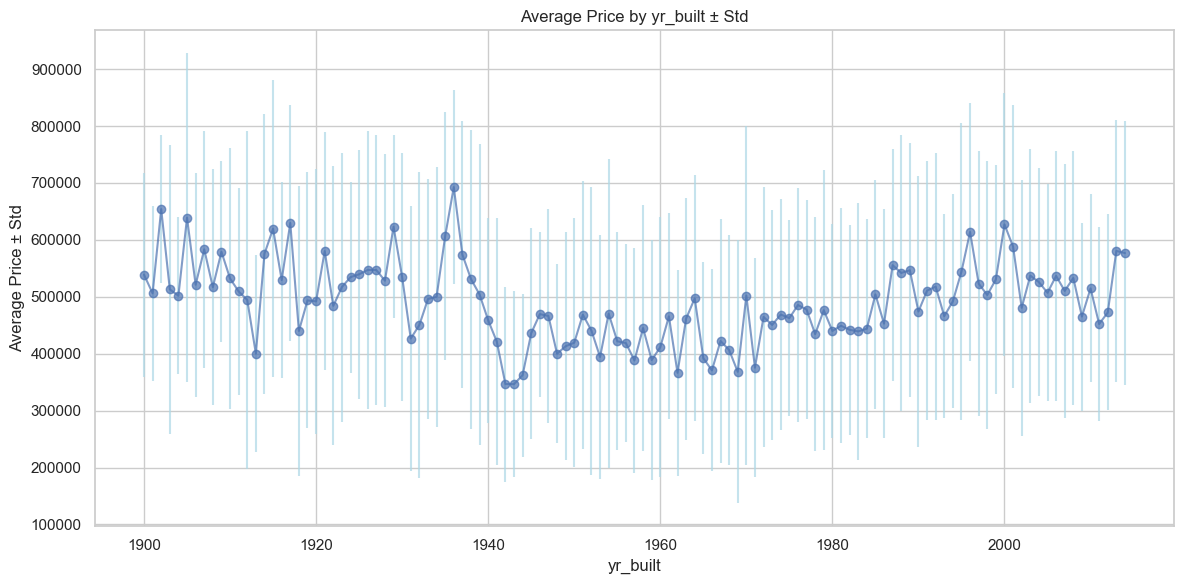

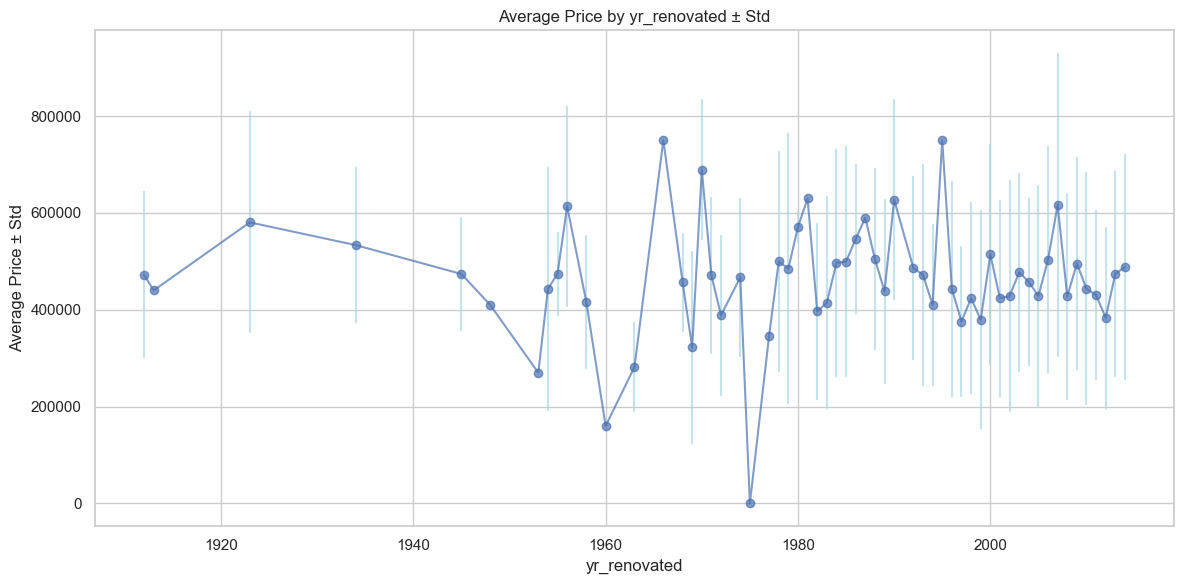

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设你之前已经完成了清洗异常值步骤，df_clean 可直接使用
# 如果未完成请先运行前面清洗代码

def plot_year_price_with_error(year_feature, df):
    # 按年份分组计算均值和标准差
    stats = df.groupby(year_feature)['price'].agg(['mean', 'std']).reset_index()
    stats = stats.dropna()

    # 画误差线图
    plt.figure(figsize=(12, 6))
    plt.errorbar(stats[year_feature], stats['mean'], yerr=stats['std'], fmt='o-', ecolor='lightblue', alpha=0.7)
    plt.title(f'Average Price by {year_feature} ± Std')
    plt.xlabel(year_feature)
    plt.ylabel('Average Price ± Std')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 绘图
plot_year_price_with_error('yr_built', df_clean)
plot_year_price_with_error('yr_renovated', df_clean[df_clean['yr_renovated'] > 0])  # 排除未翻新的房子
